In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn.linear_model import LinearRegression

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(os.path.join("gdp_vs_crude_oil_export.csv"))
df.drop(labels="Unnamed: 0", axis=1, inplace=True)
df_no_ban = df[df["year"]>2015]
# df.head()

In [3]:
X = df.export.values.reshape(-1, 1)
y = df.gdp.values.reshape(-1, 1)

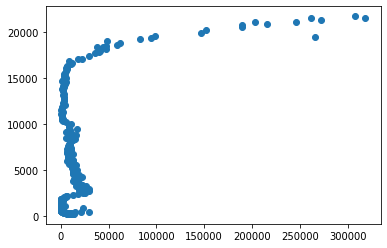

In [4]:
plt.scatter(X, y, )

In [5]:
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[0.07349165]]
y-axis intercept:  [5000.29752239]


In [6]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
model.score(X, y)

Mean Squared Error (MSE): 29356888.6635891
R-squared (R2 ): 0.28855399957506755


0.28855399957506755

# export ban vs no ban

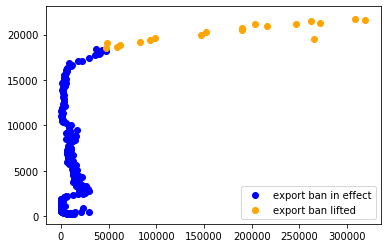

In [7]:
plt.scatter(df[df["year"]<=2015].export.values.reshape(-1,1),df[df["year"]<=2015].gdp.values.reshape(-1,1), c="blue", label="export ban in effect")
plt.scatter(df[df["year"]>2015].export.values.reshape(-1,1),df[df["year"]>2015].gdp.values.reshape(-1,1), c="orange", label="export ban lifted")
plt.legend()
plt.show();

# linear regression

In [8]:
X1 = df_no_ban.export.values.reshape(-1, 1)
y1 = df_no_ban.gdp.values.reshape(-1, 1)

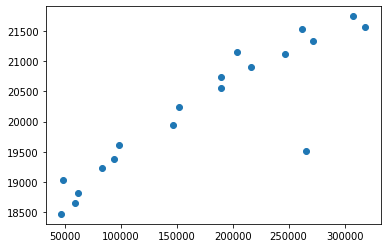

In [9]:
plt.scatter(X1, y1)

In [10]:
model1 = LinearRegression()
model1.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('Weight coefficients: ', model1.coef_)
print('y-axis intercept: ', model1.intercept_) 

Weight coefficients:  [[0.01058186]]
y-axis intercept:  [18370.98741346]


In [12]:
# Use our model to predict a value
predicted1 = model1.predict(X1)

# Score the prediction with mse and r2
mse1 = mean_squared_error(y1, predicted1)
r21 = r2_score(y1, predicted1)

print(f"Mean Squared Error (MSE): {mse1}")
print(f"R-squared (R2 ): {r21}")
model1.score(X1, y1)

Mean Squared Error (MSE): 214122.09090000985
R-squared (R2 ): 0.8072502406393057


0.8072502406393057

# random split for train and test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
model2=LinearRegression()
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
predictions = model2.predict(X_test)

In [16]:
model2.score(X_test, y_test)

0.29147173773624835

# train and test based on the timeperiod

In [17]:
X_train2= df_no_ban[df_no_ban["year"]<2020].export.values.reshape(-1, 1)
X_test2 =  df_no_ban[df_no_ban["year"]==2020].export.values.reshape(-1, 1)
y_train2 =  df_no_ban[df_no_ban["year"]<2020].gdp.values.reshape(-1, 1)
y_test2 = df_no_ban[df_no_ban["year"]==2020].gdp.values.reshape(-1, 1)

In [18]:
model3 = LinearRegression()
model3.fit(X_train2, y_train2)
model3.score(X_test2, y_test2)

-0.7788129000698887

# change in gdp vs export

In [23]:
df

,gdp,year,quater,export
0,21157.635,2020,Q3,203510
1,19520.114,2020,Q2,265687
2,21561.139,2020,Q1,318563
3,21747.394,2019,Q4,307826
4,21540.325,2019,Q3,262069
...,...,...,...,...
290,265.742,1948,Q1,8756
291,259.745,1947,Q4,12076
292,249.585,1947,Q3,13410
293,245.968,1947,Q2,12546


In [ ]:
df